In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src.random_unitary import random_energy_preserving_unitary
import matplotlib.pyplot as plt
import numpy as np
from src import measurements as measure, density_matrix as DM

In [3]:
N = 8
chunks = 2
block_size = N // chunks

In [4]:
b = DM.energy_basis(block_size)
I = DM.Identity(b)

In [5]:
pops = [[.1,.1,.1,.2,.4,.4,.4,.3]]

In [6]:
sys = DM.n_thermal_qbits(pops[0])
sys.change_to_energy_basis()

In [18]:
for i in range(20):
    Unitarys = []
    for chunk_index in range(chunks):
        to_tensor = [I for _ in range(chunks)]
        to_tensor[chunk_index] = random_energy_preserving_unitary(block_size)
        U = to_tensor[0].tensor(*to_tensor[1:])
        Unitarys.append(U)
    for U in Unitarys:
        U.change_to_energy_basis()
        sys = U * sys * U.H
    pops.append(np.real(measure.pops(sys)))

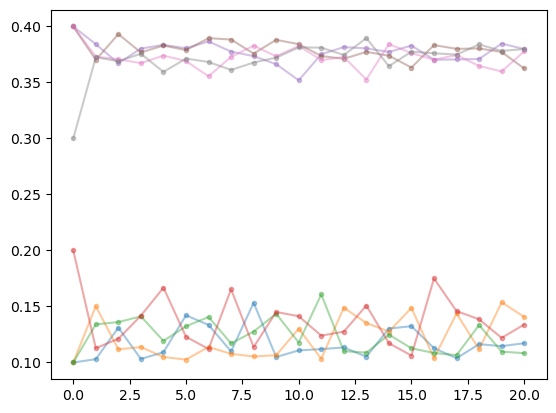

In [19]:
plt.plot(pops,linestyle='-', marker='.',alpha = .4)
plt.show()

Above, we broke our system in to two subsystems, effectivly running two seperate isolated simulations of the two. This happens above becouse we say 2 chunks, dividing the system in half, and then we leave the system order unchanged, so each chunk is the same for every step of the simulation.

By shifting the order of the qbits each iteration the subsystems can exchange information and mix, coming to a joint thermalization.

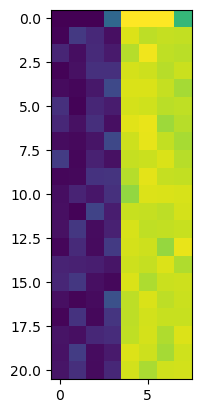

In [20]:
plt.imshow(pops)

In [21]:
measure.average_temp(sys)

1.2391971237957478

In [22]:
measure.extractable_work(.1,sys)

/Users/unnatiakhouri/Documents/GitHub/QuNet/QuNet_bootcamp_2025/../src/density_matrix.py:355: Warning: Requires conversion to and from dense
  warnings.warn("Requires conversion to and from dense", Warning)
/Users/unnatiakhouri/Documents/GitHub/QuNet/QuNet_bootcamp_2025/../src/density_matrix.py:359: RuntimeWarning: logm result may be inaccurate, approximate err = 2.434637963233399e-06
  return DensityMatrix(SPARSE_TYPE(logm(dm.data.todense())), dm.basis)
/Users/unnatiakhouri/miniconda3/lib/python3.12/site-packages/scipy/linalg/_matfuncs.py:202: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  F = scipy.linalg._matfuncs_inv_ssq._logm(A)


1.5894813025597447